In [ ]:
from google.colab import files
uploaded = files.upload()



Saving Kickers 2022 Season - Sheet1.csv to Kickers 2022 Season - Sheet1.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Replace 'your_file.csv' with the actual name of your CSV file
df = pd.read_csv('Kickers 2022 Season - Sheet1.csv')

columns_to_drop = df.columns[10:]
df = df.drop(columns=columns_to_drop)

# Display the first few rows of the DataFrame

df.rename(columns={'Unnamed: 0': 'Week'}, inplace=True)
df.head()

,Week,Kicker Name,Team,Opponent,Home/Away,Stadium,Stadium Type,Grass Type,Fantasy Points,Wind
0,1,Younghoe Koo,ATL,NO,Home,Mercedes-Benz Stadium,Indoors,Turf,18,2
1,1,Cade York,CLE,CAR,Away,Bank of America Stadium,Outdoors,Turf,16,9
2,1,Chris Boswell,PIT,CIN,Away,Paycor Stadium,Outdoors,Turf,13,4
3,1,Greg Joseph,MIN,GB,Home,U.S. Bank Stadium,Indoors,Turf,13,5
4,1,Ryan Succop,TB,DAL,Away,AT&T Stadium,Indoors,Turf,13,6


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

# Base URL of the page to scrape
base_url = "https://www.nflweather.com/week/2022/week-"

# Mapping of full team names to abbreviations
team_abbreviations = {
    "Rams": "LAR",
    "Bills": "BUF",
    "Falcons": "ATL",
    "Saints": "NO",
    "Bears": "CHI",
    "49ers": "SF",
    "Bengals": "CIN",
    "Steelers": "PIT",
    "Lions": "DET",
    "Eagles": "PHI",
    "Dolphins": "MIA",
    "Patriots": "NE",
    "Jets": "NYJ",
    "Ravens": "BAL",
    "Washington": "WAS",
    "Jaguars": "JAC",
    "Panthers": "CAR",
    "Browns": "CLE",
    "Texans": "HOU",
    "Colts": "IND",
    "Titans": "TEN",
    "Giants": "NYG",
    "Vikings": "MIN",
    "Packers": "GB",
    "Cardinals": "ARI",
    "Chiefs": "KC",
    "Chargers": "LAC",
    "Raiders": "LV",
    "Cowboys": "DAL",
    "Buccaneers": "TB",
    "Seahawks": "SEA",
    "Broncos": "DEN"
}

# Function to scrape data for a given week
def scrape_week(week_number):
    url = f"{base_url}{week_number}"
    print(f"Scraping data for week {week_number}...")

    try:
        # Send a GET request to the page
        response = requests.get(url)
        response.raise_for_status()  # Check if request was successful
    except requests.RequestException as e:
        print(f"Error fetching the page for week {week_number}: {e}")
        return []

    soup = BeautifulSoup(response.content, 'html.parser')

    # Initialize lists to store the team names and wind speeds
    games = []

    # Find all game containers using the correct class name
    game_containers = soup.find_all('div', class_='game-box w-100 d-flex flex-column flex-lg-row align-items-center shadow-box rounded my-2 py-1')

    for container in game_containers:
        try:
            # Extract team names
            away_team_span = container.find('span', class_='fw-bold')
            home_team_span = container.find('span', class_='fw-bold ms-1')

            away_team = away_team_span.text.strip() if away_team_span else "Unknown"
            home_team = home_team_span.text.strip() if home_team_span else "Unknown"

            # Convert to abbreviation
            away_team_abbr = team_abbreviations.get(away_team, away_team)
            home_team_abbr = team_abbreviations.get(home_team, home_team)

            # Extract wind speed
            wind_div = container.find('div', class_='text-break col-md-2 mb-1 px-1 flex-centered')
            if wind_div:
                # Extract and clean the wind speed text
                wind_text = wind_div.get_text(separator=' ').strip()
                wind_text = wind_text.replace('\xa0', ' ')  # Replace non-breaking space with regular space
                # Extract the numerical part of the wind speed using regex
                wind_speed_match = re.search(r'(\d+)\s*mph', wind_text)
                wind_speed = wind_speed_match.group(1) if wind_speed_match else "N/A"
            else:
                wind_speed = "N/A"  # In case wind speed is not available

            # Append formatted result with week number
            games.append({
                'week': week_number,
                'home_team': home_team_abbr,
                'away_team': away_team_abbr,
                'wind_speed': wind_speed
            })

        except Exception as e:
            print(f"Error processing container for week {week_number}: {e}")

    return games

# Scrape data for weeks 5 to 18
all_games = []
for week in range(5, 19):  # Weeks 5 to 18 inclusive
    week_games = scrape_week(week)
    all_games.extend(week_games)


Scraping data for week 5...
Scraping data for week 6...
Scraping data for week 7...
Scraping data for week 8...
Scraping data for week 9...
Scraping data for week 10...
Scraping data for week 11...
Scraping data for week 12...
Scraping data for week 13...
Scraping data for week 14...
Scraping data for week 15...
Scraping data for week 16...
Scraping data for week 17...
Scraping data for week 18...


In [ ]:
scraped_df = pd.DataFrame(all_games)


# Function to add wind speed data to the DataFrame
def add_wind_speed(df, scraped_df):
    # Create a new DataFrame for the additional entries
    additional_entries = []

    for _, row in scraped_df.iterrows():
        home_team = row['home_team']
        away_team = row['away_team']
        wind_speed = row['wind_speed']
        week = row['week']

        # Create entries for both teams
        home_entry = {
            'Week': week,
            'Team': home_team,
            'Opponent': away_team,
            'Home/Away': 'Home',
            'Stadium': 'Unknown',  # Add any additional information if available
            'Stadium Type': 'Unknown',
            'Grass Type': 'Unknown',
            'Fantasy Points': 0,  # Placeholder
            'Wind': wind_speed
        }
        away_entry = {
            'Week': week,
            'Team': away_team,
            'Opponent': home_team,
            'Home/Away': 'Away',
            'Stadium': 'Unknown',  # Add any additional information if available
            'Stadium Type': 'Unknown',
            'Grass Type': 'Unknown',
            'Fantasy Points': 0,  # Placeholder
            'Wind': wind_speed
        }

        additional_entries.append(home_entry)
        additional_entries.append(away_entry)

    # Convert additional entries to DataFrame
    additional_df = pd.DataFrame(additional_entries)

    # Append additional entries to the existing DataFrame
    updated_df = pd.concat([df, additional_df], ignore_index=True)

    return updated_df

# Integrate wind speed data
updated_df = add_wind_speed(df, scraped_df)

# Save the updated DataFrame with the new entries
updated_df.to_csv('kickers_stats_2022_final.csv', index=False)

In [ ]:
updated_df

,Week,Kicker Name,Team,Opponent,Home/Away,Stadium,Stadium Type,Grass Type,Fantasy Points,Wind
0,1,Younghoe Koo,ATL,NO,Home,Mercedes-Benz Stadium,Indoors,Turf,18,2
1,1,Cade York,CLE,CAR,Away,Bank of America Stadium,Outdoors,Turf,16,9
2,1,Chris Boswell,PIT,CIN,Away,Paycor Stadium,Outdoors,Turf,13,4
3,1,Greg Joseph,MIN,GB,Home,U.S. Bank Stadium,Indoors,Turf,13,5
4,1,Ryan Succop,TB,DAL,Away,AT&T Stadium,Indoors,Turf,13,6
...,...,...,...,...,...,...,...,...,...,...
539,18,NaN,LAR,SEA,Away,Unknown,Unknown,Unknown,0,6
540,18,NaN,WAS,DAL,Home,Unknown,Unknown,Unknown,0,5
541,18,NaN,DAL,WAS,Away,Unknown,Unknown,Unknown,0,5
542,18,NaN,GB,DET,Home,Unknown,Unknown,Unknown,0,8


In [ ]:
import pandas as pd

# Create a dictionary with stadium information
stadium_data = {
    'Team': [
        'ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 'DEN', 'DET', 'GB',
        'HOU', 'IND', 'JAX', 'KC', 'LV', 'LAC', 'LAR', 'MIA', 'MIN', 'NE', 'NO', 'NYG',
        'NYJ', 'PHI', 'PIT', 'SF', 'SEA', 'TB', 'TEN', 'WAS'
    ],
    'Stadium Name': [
        'State Farm Stadium', 'Mercedes-Benz Stadium', 'M&T Bank Stadium', 'Highmark Stadium',
        'Bank of America Stadium', 'Soldier Field', 'Paycor Stadium', 'Cleveland Browns Stadium',
        'AT&T Stadium', 'Empower Field at Mile High', 'Ford Field', 'Lambeau Field', 'NRG Stadium',
        'Lucas Oil Stadium', 'TIAA Bank Field', 'GEHA Field at Arrowhead Stadium', 'Allegiant Stadium',
        'SoFi Stadium', 'SoFi Stadium', 'Hard Rock Stadium', 'U.S. Bank Stadium', 'Gillette Stadium',
        'Caesars Superdome', 'MetLife Stadium', 'MetLife Stadium', 'Lincoln Financial Field',
        'Acrisure Stadium', 'Levi\'s Stadium', 'Lumen Field', 'Raymond James Stadium',
        'Nissan Stadium', 'Commanders Field'
    ],
    'Stadium Type': [
        'Indoors', 'Indoors', 'Outdoors', 'Outdoors', 'Outdoors', 'Outdoors', 'Outdoors', 'Outdoors',
        'Indoors', 'Outdoors', 'Indoors', 'Outdoors', 'Indoors', 'Indoors', 'Outdoors', 'Outdoors',
        'Indoors', 'Indoors', 'Indoors', 'Outdoors', 'Indoors', 'Outdoors', 'Indoors', 'Outdoors',
        'Outdoors', 'Outdoors', 'Outdoors', 'Outdoors', 'Outdoors', 'Outdoors', 'Outdoors', 'Outdoors'
    ],
    'Grass Type': [
        'Grass', 'Turf', 'Turf', 'Turf', 'Turf', 'Grass', 'Turf', 'Turf', 'Turf', 'Grass', 'Turf', 'Grass',
        'Grass', 'Turf', 'Grass', 'Grass', 'Grass', 'Turf', 'Turf', 'Grass', 'Turf', 'Turf', 'Turf',
        'Turf', 'Turf', 'Grass', 'Turf', 'Grass', 'Turf', 'Grass', 'Turf', 'Grass'
    ]
}

# Create a DataFrame from the dictionary
stadium_df = pd.DataFrame(stadium_data)

# Display the DataFrame to verify
stadium_df.head()


,Team,Stadium Name,Stadium Type,Grass Type
0,ARI,State Farm Stadium,Indoors,Grass
1,ATL,Mercedes-Benz Stadium,Indoors,Turf
2,BAL,M&T Bank Stadium,Outdoors,Turf
3,BUF,Highmark Stadium,Outdoors,Turf
4,CAR,Bank of America Stadium,Outdoors,Turf


In [ ]:
import pandas as pd

# Create a dictionary for quick lookup from the stadium DataFrame
stadium_dict = stadium_df.set_index('Team').T.to_dict('list')

# Function to get stadium information based on the team and type
def get_stadium_info(team, info_type):
    """Retrieve stadium information for a given team."""
    if team in stadium_dict:
        idx = {'Stadium Name': 0, 'Stadium Type': 1, 'Grass Type': 2}
        return stadium_dict[team][idx[info_type]]
    return None

# Update the existing columns with stadium information
def update_stadium_info(row):
    if row['Home/Away'] == 'Home':
        row['Stadium'] = get_stadium_info(row['Team'], 'Stadium Name')
        row['Stadium Type'] = get_stadium_info(row['Team'], 'Stadium Type')
        row['Grass Type'] = get_stadium_info(row['Team'], 'Grass Type')
    else:
        row['Stadium'] = get_stadium_info(row['Opponent'], 'Stadium Name')
        row['Stadium Type'] = get_stadium_info(row['Opponent'], 'Stadium Type')
        row['Grass Type'] = get_stadium_info(row['Opponent'], 'Grass Type')
    return row

# Apply the update function to each row
updated_df = updated_df.apply(update_stadium_info, axis=1)

# Save the updated DataFrame
updated_df.to_csv('kickers_stats_2022_with_stadium_info.csv', index=False)

# Display the updated DataFrame
updated_df.head()


,Week,Kicker Name,Team,Opponent,Home/Away,Stadium,Stadium Type,Grass Type,Fantasy Points,Wind
0,1,Younghoe Koo,ATL,NO,Home,Mercedes-Benz Stadium,Indoors,Turf,18,2
1,1,Cade York,CLE,CAR,Away,Bank of America Stadium,Outdoors,Turf,16,9
2,1,Chris Boswell,PIT,CIN,Away,Paycor Stadium,Outdoors,Turf,13,4
3,1,Greg Joseph,MIN,GB,Home,U.S. Bank Stadium,Indoors,Turf,13,5
4,1,Ryan Succop,TB,DAL,Away,AT&T Stadium,Indoors,Turf,13,6


In [ ]:
# Define the columns to keep
columns_to_keep = [
    'Week', 'Kicker Name', 'Team', 'Opponent', 'Home/Away', 'Stadium', 'Stadium Type', 'Grass Type', 'Fantasy Points', 'Wind'
]

# Filter the DataFrame to only keep the specified columns
cleaned_df = updated_df[columns_to_keep]

# Save the cleaned DataFrame
cleaned_df.to_csv('kickers_stats_2022_cleaned.csv', index=False)

# Display the cleaned DataFrame
df = cleaned_df

df.to_csv('kickers_stats_2022_temporary.csv', index=False)
original_df = df
original_df

,Week,Kicker Name,Team,Opponent,Home/Away,Stadium,Stadium Type,Grass Type,Fantasy Points,Wind
0,1,Younghoe Koo,ATL,NO,Home,Mercedes-Benz Stadium,Indoors,Turf,18,2
1,1,Cade York,CLE,CAR,Away,Bank of America Stadium,Outdoors,Turf,16,9
2,1,Chris Boswell,PIT,CIN,Away,Paycor Stadium,Outdoors,Turf,13,4
3,1,Greg Joseph,MIN,GB,Home,U.S. Bank Stadium,Indoors,Turf,13,5
4,1,Ryan Succop,TB,DAL,Away,AT&T Stadium,Indoors,Turf,13,6
...,...,...,...,...,...,...,...,...,...,...
539,18,NaN,LAR,SEA,Away,Lumen Field,Outdoors,Turf,0,6
540,18,NaN,WAS,DAL,Home,Commanders Field,Outdoors,Grass,0,5
541,18,NaN,DAL,WAS,Away,Commanders Field,Outdoors,Grass,0,5
542,18,NaN,GB,DET,Home,Lambeau Field,Outdoors,Grass,0,8


In [ ]:
from google.colab import files
files.download('kickers_stats_2022_temporary.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import requests
from bs4 import BeautifulSoup

# Base URL with a placeholder for the week number
base_url = "https://www.fftoday.com/stats/playerstats.php?Season=2022&GameWeek={}&PosID=80&LeagueID="

all_kicker_data = []

# Loop through weeks 5 to 18
for week in range(5, 19):
    url = base_url.format(week)

    # Send an HTTP request to the URL
    response = requests.get(url)

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all rows in the table
    rows = soup.find_all('tr')

    # Loop through each row
    for row in rows:
        # Find all <td> elements in the row
        columns = row.find_all('td')

        if len(columns) > 0 and columns[0].get('align') == 'LEFT':
            # Extract kicker's name from the first <td>
            kicker_name_tag = columns[0].find('a')
            if kicker_name_tag:
                kicker_name = kicker_name_tag.text.strip()

                # Extract team from the second <td>
                team = columns[1].text.strip()

                # Extract fantasy points from the <td> with bgcolor="#e0e0e0"
                fantasy_points_tag = row.find('td', bgcolor="#e0e0e0")
                if fantasy_points_tag:
                    fantasy_points = fantasy_points_tag.text.strip()

                    # Store the kicker's data
                    all_kicker_data.append({
                        'Week': week,
                        'Kicker Name': kicker_name,
                        'Team': team,
                        'Fantasy Points': fantasy_points
                    })

# Print the extracted kicker data
for data in all_kicker_data:
    print(data)


{'Week': 5, 'Kicker Name': 'Nick Folk', 'Team': 'NE', 'Fantasy Points': '17.0'}
{'Week': 5, 'Kicker Name': 'Justin Tucker', 'Team': 'BAL', 'Fantasy Points': '13.0'}
{'Week': 5, 'Kicker Name': 'Taylor Bertolet', 'Team': 'LAC', 'Fantasy Points': '12.0'}
{'Week': 5, 'Kicker Name': 'Chase McLaughlin', 'Team': 'IND', 'Fantasy Points': '12.0'}
{'Week': 5, 'Kicker Name': 'Daniel Carlson', 'Team': 'LV', 'Fantasy Points': '11.0'}
{'Week': 5, 'Kicker Name': 'Brett Maher', 'Team': 'DAL', 'Fantasy Points': '10.0'}
{'Week': 5, 'Kicker Name': 'Cairo Santos', 'Team': 'CHI', 'Fantasy Points': '10.0'}
{'Week': 5, 'Kicker Name': 'Graham Gano', 'Team': 'NYG', 'Fantasy Points': '9.0'}
{'Week': 5, 'Kicker Name': 'Brandon McManus', 'Team': 'DEN', 'Fantasy Points': '9.0'}
{'Week': 5, 'Kicker Name': 'Eddy Pineiro', 'Team': 'CAR', 'Fantasy Points': '9.0'}
{'Week': 5, 'Kicker Name': 'Tyler Bass', 'Team': 'BUF', 'Fantasy Points': '8.0'}
{'Week': 5, 'Kicker Name': 'Mason Crosby', 'Team': 'GB', 'Fantasy Points': '

In [ ]:

# Convert the list of dictionaries to a DataFrame
temp_df = pd.DataFrame(all_kicker_data)

# Save the DataFrame to a CSV file
temp_df.to_csv('kicker_stats_weeks_5_to_18.csv', index=False)

print("Data saved to kicker_stats_weeks_5_to_18.csv")


Data saved to kicker_stats_weeks_5_to_18.csv


In [ ]:


# Load the scraped data
scraped_df = pd.read_csv('kicker_stats_weeks_5_to_18.csv')

# Ensure 'Fantasy Points' in the scraped DataFrame are numeric
scraped_df['Fantasy Points'] = pd.to_numeric(scraped_df['Fantasy Points'], errors='coerce').fillna(0).astype(int)

# First merge to add kicker names
df_with_names = pd.merge(df, scraped_df[['Week', 'Team', 'Kicker Name']],
                         on=['Week', 'Team'], how='left')

# Print column names to verify


# Rename columns for clarity
df_with_names.rename(columns={'Kicker Name_x': 'Kicker Name', 'Kicker Name_y': 'Kicker Name_scraped'}, inplace=True)

# Combine the fantasy points, keeping the scraped points where available
df_with_names['Kicker Name'] = df_with_names['Kicker Name'].combine_first(df_with_names['Kicker Name_scraped'])



# Drop unnecessary columns
df_with_names.drop(columns=['Kicker Name_scraped'], inplace=True)

# Save the final DataFrame
df_with_names.to_csv('kickers_stats_2022_updated.csv', index=False)

print("Data merged and saved to kickers_stats_2022_updated.csv")
df = df_with_names

df

Data merged and saved to kickers_stats_2022_updated.csv


,Week,Kicker Name,Team,Opponent,Home/Away,Stadium,Stadium Type,Grass Type,Fantasy Points,Wind
0,1,Younghoe Koo,ATL,NO,Home,Mercedes-Benz Stadium,Indoors,Turf,18,2
1,1,Cade York,CLE,CAR,Away,Bank of America Stadium,Outdoors,Turf,16,9
2,1,Chris Boswell,PIT,CIN,Away,Paycor Stadium,Outdoors,Turf,13,4
3,1,Greg Joseph,MIN,GB,Home,U.S. Bank Stadium,Indoors,Turf,13,5
4,1,Ryan Succop,TB,DAL,Away,AT&T Stadium,Indoors,Turf,13,6
...,...,...,...,...,...,...,...,...,...,...
540,18,Matt Gay,LAR,SEA,Away,Lumen Field,Outdoors,Turf,0,6
541,18,Joey Slye,WAS,DAL,Home,Commanders Field,Outdoors,Grass,0,5
542,18,Brett Maher,DAL,WAS,Away,Commanders Field,Outdoors,Grass,0,5
543,18,Mason Crosby,GB,DET,Home,Lambeau Field,Outdoors,Grass,0,8


In [ ]:

scraped_df = pd.read_csv('kicker_stats_weeks_5_to_18.csv')  # Scraped Data

# Ensure the fantasy points in scraped data are integers
scraped_df['Fantasy Points'] = pd.to_numeric(scraped_df['Fantasy Points'], errors='coerce').fillna(0).astype(int)

# Create a dictionary for quick lookups
points_dict = scraped_df.set_index(['Week', 'Kicker Name'])['Fantasy Points'].to_dict()

# Define a function to lookup fantasy points
def get_fantasy_points(row):
    return points_dict.get((row['Week'], row['Kicker Name']), row['Fantasy Points'])

# Update only rows from index 128 onward
df.loc[128:, 'Fantasy Points'] = df.loc[128:].apply(get_fantasy_points, axis=1)

# Save the updated DataFrame
df.to_csv('kickers_stats_2022_updated.csv', index=False)
print("Data updated and saved to kickers_stats_2022_updated.csv")

df


Data updated and saved to kickers_stats_2022_updated.csv


,Week,Kicker Name,Team,Opponent,Home/Away,Stadium,Stadium Type,Grass Type,Fantasy Points,Wind
0,1,Younghoe Koo,ATL,NO,Home,Mercedes-Benz Stadium,Indoors,Turf,18,2
1,1,Cade York,CLE,CAR,Away,Bank of America Stadium,Outdoors,Turf,16,9
2,1,Chris Boswell,PIT,CIN,Away,Paycor Stadium,Outdoors,Turf,13,4
3,1,Greg Joseph,MIN,GB,Home,U.S. Bank Stadium,Indoors,Turf,13,5
4,1,Ryan Succop,TB,DAL,Away,AT&T Stadium,Indoors,Turf,13,6
...,...,...,...,...,...,...,...,...,...,...
540,18,Matt Gay,LAR,SEA,Away,Lumen Field,Outdoors,Turf,10,6
541,18,Joey Slye,WAS,DAL,Home,Commanders Field,Outdoors,Grass,8,5
542,18,Brett Maher,DAL,WAS,Away,Commanders Field,Outdoors,Grass,0,5
543,18,Mason Crosby,GB,DET,Home,Lambeau Field,Outdoors,Grass,10,8


In [ ]:

scraped_df = pd.read_csv('kicker_stats_weeks_5_to_18.csv')  # Scraped Data

# Ensure the fantasy points in scraped data are integers
scraped_df['Fantasy Points'] = pd.to_numeric(scraped_df['Fantasy Points'], errors='coerce').fillna(0).astype(int)

# Create a dictionary for quick lookups
points_dict = scraped_df.set_index(['Week', 'Kicker Name'])['Fantasy Points'].to_dict()

# Define a function to lookup fantasy points
def get_fantasy_points(row):
    return points_dict.get((row['Week'], row['Kicker Name']), row['Fantasy Points'])

# Apply the function to update the DataFrame
df['Fantasy Points'] = df.apply(get_fantasy_points, axis=1)

# Save the updated DataFrame
df.to_csv('kickers_stats_2022_updated.csv', index=False)
print("Data updated and saved to kickers_stats_2022_updated.csv")


df

Data updated and saved to kickers_stats_2022_updated.csv


,Week,Kicker Name,Team,Opponent,Home/Away,Stadium,Stadium Type,Grass Type,Fantasy Points,Wind
0,1,Younghoe Koo,ATL,NO,Home,Mercedes-Benz Stadium,Indoors,Turf,18,2
1,1,Cade York,CLE,CAR,Away,Bank of America Stadium,Outdoors,Turf,16,9
2,1,Chris Boswell,PIT,CIN,Away,Paycor Stadium,Outdoors,Turf,13,4
3,1,Greg Joseph,MIN,GB,Home,U.S. Bank Stadium,Indoors,Turf,13,5
4,1,Ryan Succop,TB,DAL,Away,AT&T Stadium,Indoors,Turf,13,6
...,...,...,...,...,...,...,...,...,...,...
540,18,Matt Gay,LAR,SEA,Away,Lumen Field,Outdoors,Turf,10,6
541,18,Joey Slye,WAS,DAL,Home,Commanders Field,Outdoors,Grass,8,5
542,18,Brett Maher,DAL,WAS,Away,Commanders Field,Outdoors,Grass,0,5
543,18,Mason Crosby,GB,DET,Home,Lambeau Field,Outdoors,Grass,10,8


Data Analysis Begins Here

In [ ]:
# Ensure that 'Fantasy Points' is numeric
df.loc[:, 'Fantasy Points'] = pd.to_numeric(df['Fantasy Points'], errors='coerce')

# Convert 'Stadium Type', 'Home/Away', and 'Grass Type' to categorical
df.loc[:, 'Stadium Type'] = df['Stadium Type'].astype('category')
df.loc[:, 'Home/Away'] = df['Home/Away'].astype('category')
df.loc[:, 'Grass Type'] = df['Grass Type'].astype('category')

# Filter DataFrame to only include the specified columns
df_filtered = df[['Stadium Type', 'Home/Away', 'Grass Type', 'Fantasy Points']]



In [ ]:
# Group by Home/Away and calculate mean fantasy points
performance_by_home_away = df_filtered.groupby('Home/Away')['Fantasy Points'].mean().reset_index()
print(performance_by_home_away)
performance_by_grass = df_filtered.groupby('Grass Type')['Fantasy Points'].mean().reset_index()
print(performance_by_grass)
# Group by home away and calculate mean fantasy points
performance_by_stadium = df_filtered.groupby('Stadium Type')['Fantasy Points'].mean().reset_index()
print(performance_by_stadium)

  Home/Away  Fantasy Points
0      Away        6.978182
1      Home        7.385185
  Grass Type  Fantasy Points
0      Grass        6.620192
1       Turf        7.507740
  Stadium Type  Fantasy Points
0      Indoors        7.606383
1     Outdoors        6.915452


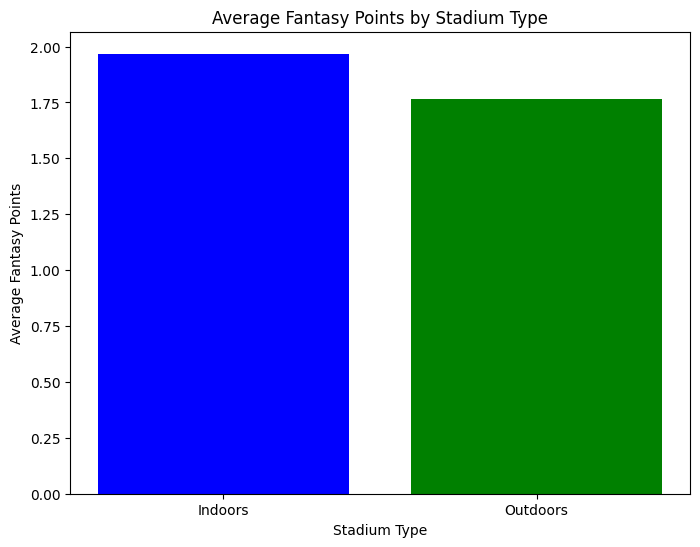

In [ ]:


# Bar plot to compare performance
plt.figure(figsize=(8, 6))
plt.bar(performance_by_stadium['Stadium Type'], performance_by_stadium['Fantasy Points'], color=['blue', 'green'])
plt.xlabel('Stadium Type')
plt.ylabel('Average Fantasy Points')
plt.title('Average Fantasy Points by Stadium Type')
plt.show()


<ipython-input-16-d7e81f64ff35>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Home/Away', y='Fantasy Points', data=performance_by_home_away, palette='viridis')


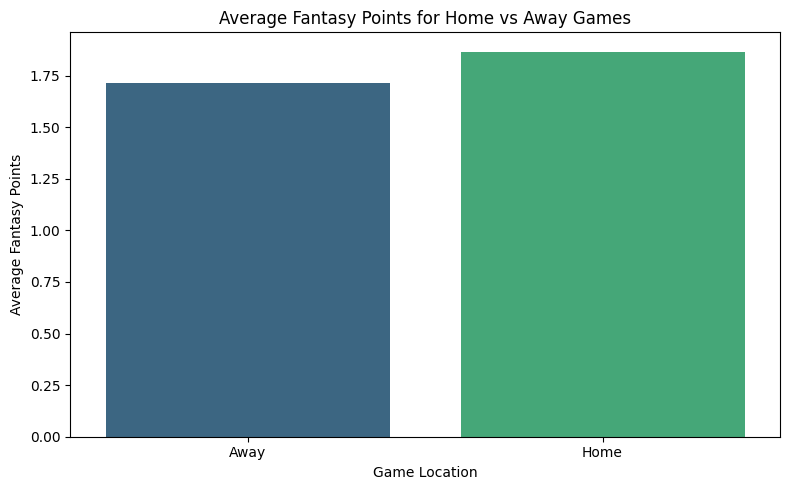

In [ ]:

# Group by Home/Away and calculate mean fantasy points
performance_by_home_away = df_filtered.groupby('Home/Away')['Fantasy Points'].mean().reset_index()

# Create a bar plot for Home vs Away
plt.figure(figsize=(8, 5))
sns.barplot(x='Home/Away', y='Fantasy Points', data=performance_by_home_away, palette='viridis')
plt.xlabel('Game Location')
plt.ylabel('Average Fantasy Points')
plt.title('Average Fantasy Points for Home vs Away Games')
plt.tight_layout()
plt.show()


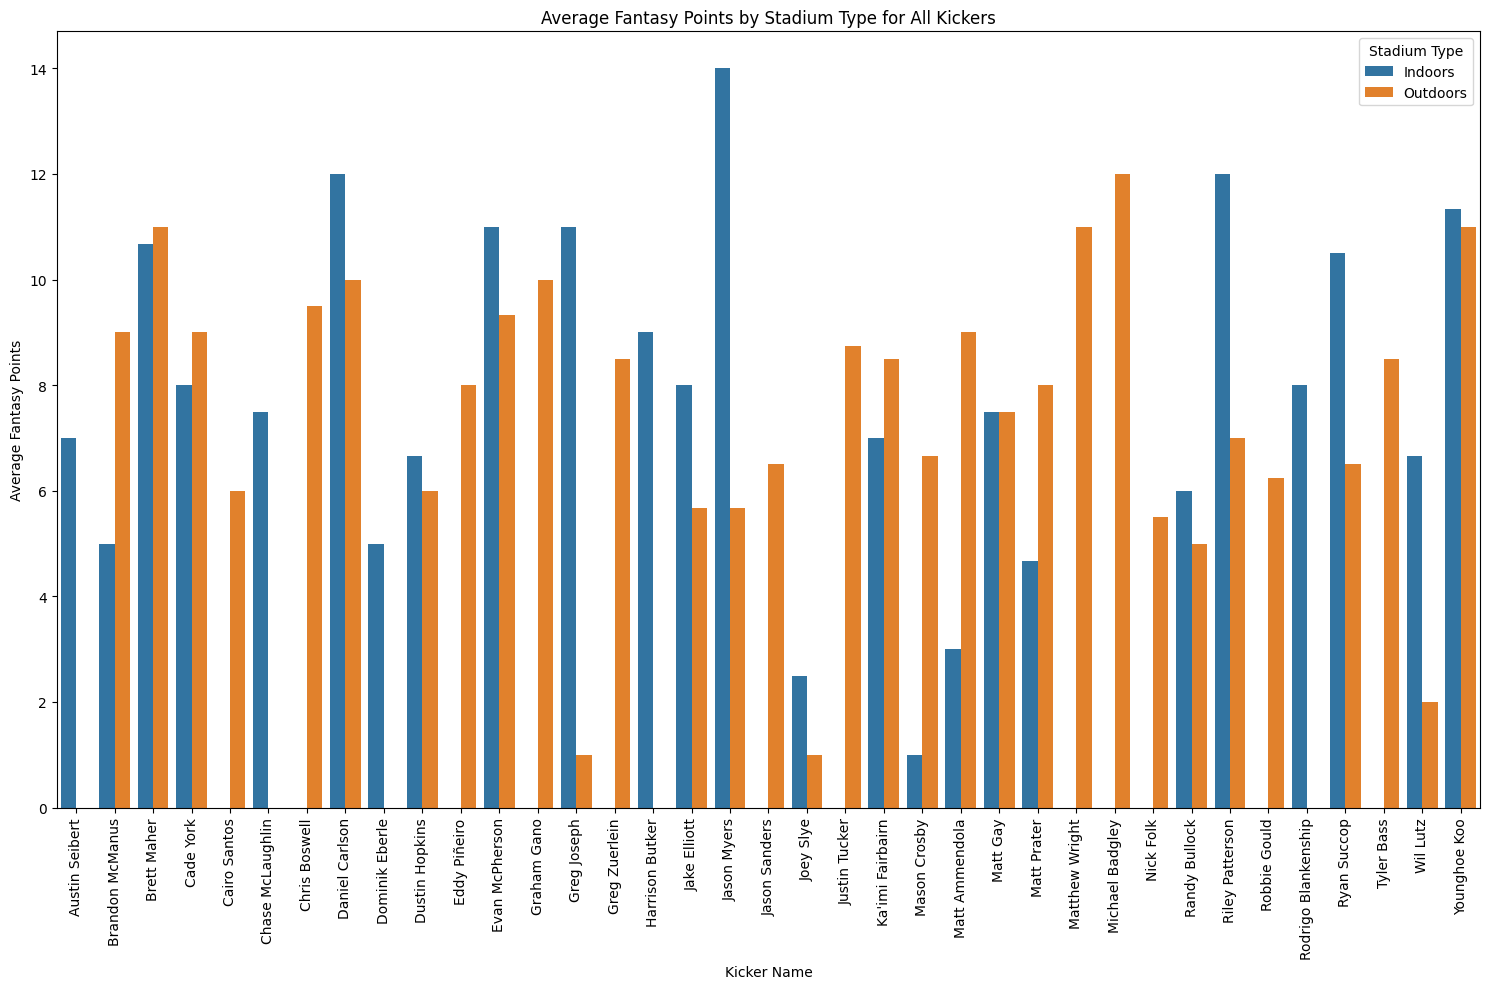

In [ ]:


# Group by Kicker Name and Stadium Type, then calculate the mean Fantasy Points
performance_by_kicker_and_stadium = df.groupby(['Kicker Name', 'Stadium Type'])['Fantasy Points'].mean().reset_index()

# Create a bar plot for each kicker
plt.figure(figsize=(15, 10))
sns.barplot(x='Kicker Name', y='Fantasy Points', hue='Stadium Type', data=performance_by_kicker_and_stadium)
plt.xticks(rotation=90)
plt.xlabel('Kicker Name')
plt.ylabel('Average Fantasy Points')
plt.title('Average Fantasy Points by Stadium Type for All Kickers')
plt.legend(title='Stadium Type')
plt.tight_layout()
plt.show()



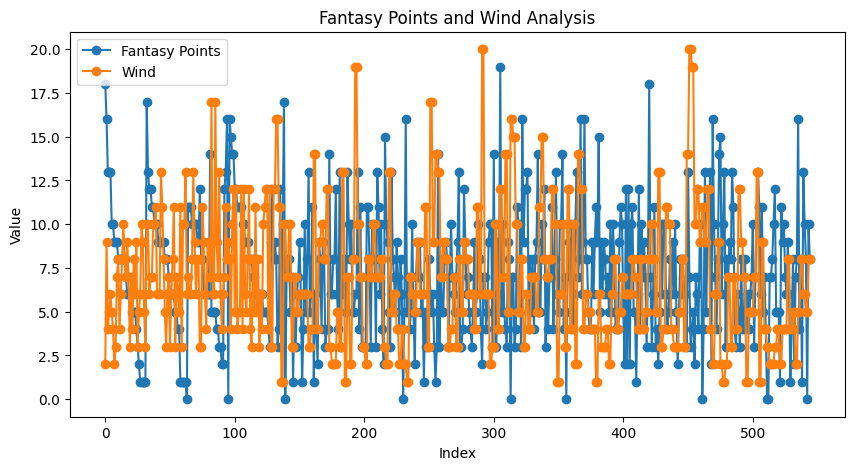

In [ ]:


# Plot Fantasy Points vs Wind
plt.figure(figsize=(10, 5))
plt.plot(df['Fantasy Points'], label='Fantasy Points', marker='o')
plt.plot(df['Wind'], label='Wind', marker='o')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Fantasy Points and Wind Analysis')
plt.legend()

# Display the plot
plt.show()


<ipython-input-91-9840bb3e1276>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Wind'] = pd.to_numeric(df_filtered['Wind'], errors='coerce').fillna(0)
<ipython-input-91-9840bb3e1276>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Fantasy Points'] = pd.to_numeric(df_filtered['Fantasy Points'], errors='coerce').fillna(0)


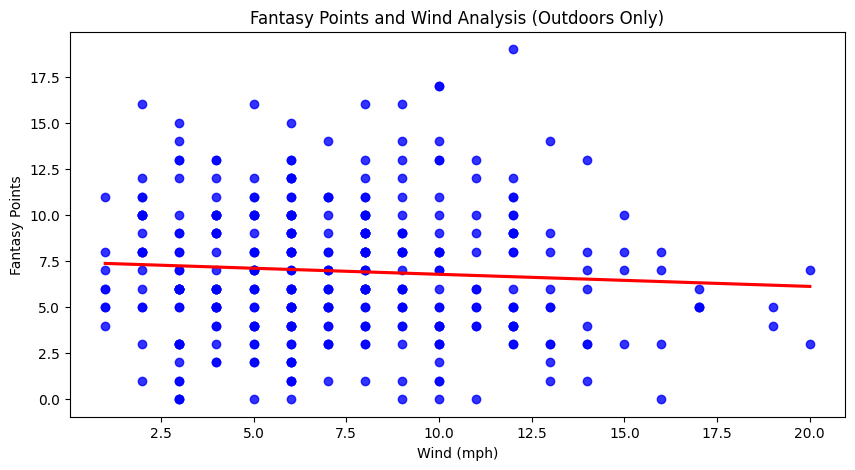

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filter out indoor games
df_filtered = df[df['Stadium Type'] != 'Indoors']

# Convert 'Wind' and 'Fantasy Points' to numeric, forcing errors to NaN and then filling NaNs with 0
df_filtered['Wind'] = pd.to_numeric(df_filtered['Wind'], errors='coerce').fillna(0)
df_filtered['Fantasy Points'] = pd.to_numeric(df_filtered['Fantasy Points'], errors='coerce').fillna(0)

# Create a scatter plot with a line of best fit
plt.figure(figsize=(10, 5))
sns.regplot(x='Wind', y='Fantasy Points', data=df_filtered, ci=None, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Adding labels and title
plt.xlabel('Wind (mph)')
plt.ylabel('Fantasy Points')
plt.title('Fantasy Points and Wind Analysis (Outdoors Only)')

# Display the plot
plt.show()
